# Title

First thing, let's import some libraries:


In [1]:
from MCL.World import World
from MCL.Robot import Robot
import numpy as np
import matplotlib.pyplot as plt

*Note: I treated the classes we got as open-source so I feel free to make some changes
in them.*

## Plotting Robots

In order to get more familiar with the `Robot` and `World` classes we were asked to
plot some robots in a world:


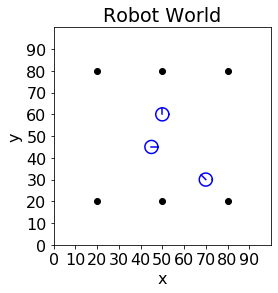

In [2]:
# Create the world & robots
poses = [(45, 45, 0), (50, 60, np.pi / 2), (70, 30, 3 * np.pi / 4)]
robots = [Robot(init_pose=p) for p in poses]
world = World()

# Plot world & robots
world.plot(show=False)
list(map(lambda x: x.plot(show=False), robots))
plt.show()

## Adding `move` method

In order to implement a `move` method as required I used the given model
motion equations with some noise. First I implemented 3 function for the motion model
The functions `x_motion`, `y_motion` and `theta_motion` getting the relevant input and
return new x, y, and theta position respectively. Then I added to the `Robot` class 3
attributes for the motion of x, y and theta. The `__init__` function assign to these
attributes the above-mentioned functions. Now, for moving any robot all we need to do
is to use these functions and then set the new position of the robot using the wonderful
giving Robot's method `set`.

## Adding `sense` method

Next we implemented a `sense` method which get list of landmarks, where
each landmark is a tuple of x and y position and return list of measurements.
Each measurement $i$ from the measurements list is also a tuple of
distance and bearing from the $i$ landmark. The follows equation
been used to compute the range and bearing:

$$range_i = \sqrt{(m_{i, x} - x)^2 + (m_{i, y} - y)^2} + \delta_{range}$$ <br>
$$bearing_i = \operatorname{atan2}(m_{i, y} - y, m_{i, x} - x) - \theta + \delta_{bearing}$$

where,

$$\delta_{range} \sim \mathcal{N}(0, \sigma_{range}), \quad \delta_{bearing} \sim \mathcal{N}(0, \sigma_{bearing})$$

and $i$ denote the $i$ landmark.

## Adding `measurement_probability` method

The `measurement_probability()` method gets the following arguments:

1. `pose` - the position we want to compute the probability for it,
in the form of $(x, y, \theta)$. Usually known as $x_t$.

1. `measurement` - the measurement we got when we used the `sense()` method,
in the form of $(r, \phi)$. Usually known as $z_t$.

1. `landmark` - the position of the landmark we measured $(r, \phi)$ to it,
in the form of $(m_x,m_y)$. Usually known as $m$

The method compute the follows expression:

$$p(z_t | x_t, m) = prob(r - \hat{r}, \sigma_r) * prob(\phi - \hat{\phi}, \sigma_{\phi})$$

where:

$$\hat{r} = \sqrt{(m_x - x)^2 - (m_y - y)^2}, \quad \hat{\phi} = atan2(m_y - y, m_x - x) - \theta$$

## Robot Performance - Without Noise

In order to plot the given commands I added an attribute to the `Robot` class. The new attribute is a list
named `path` and contains all the $(x, y)$ points the robot was located at them. In the
`__init__` method the initial pose append to `path` and in each call of the `move` method
the new position appended to the `path` list.

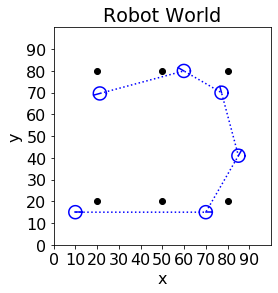

In [3]:
# Init world & robot
world = World()
robot = Robot(init_pose=(10, 15, 0))
moves = [(0, 60), (np.pi / 3, 30), (np.pi / 4, 30), (np.pi / 4, 20), (np.pi / 4, 40)]

# Init plot
world.plot()
robot.plot()

# Make the moves and plot them
for u_1, u_2 in moves:
    robot.move(u_1, u_2)
    robot.plot()

# Add the dotted line and plot
plt.plot(*(zip(*robot.path)), 'b:')
plt.show()


We can see the robot move perfectly without any noise in the motion commands. So now we
need to examine how it look like where we add some noise.

## Robot Performance - With Noise

We add another robot to the world, but now with some noise. The new robot's initial pose is also $(10,15,0)$
but the second robot will have noisy motor commands. The noise defined to be $\sigma_1=0.1$
and $\sigma_2 = 6$. Now we plot both robot moves on the same plot:


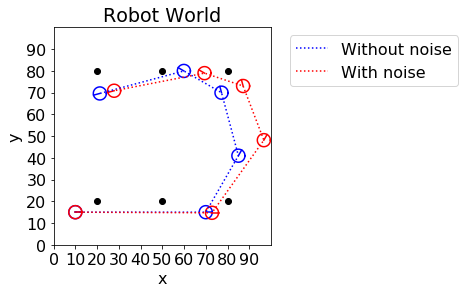

In [10]:
# Init both robots
robot_1 = Robot(init_pose=(10, 15, 0))
robot_2 = Robot(init_pose=(10, 15, 0), noise_std={'forward': 6, 'turn': 0.1, 'range': 5, 'bearing': 0.3})

# Init plot
world.plot()
robot_1.plot()
robot_2.plot(mycolor='r')

# Move both robots and plot the moves
for u_1, u_2 in moves:
    robot_1.move(u_1, u_2)
    robot_2.move(u_1, u_2)
    robot_1.plot()
    robot_2.plot(mycolor='r')

# Add the robot path
plt.plot(*(zip(*robot_1.path)), 'b:', label='Without noise')
plt.plot(*(zip(*robot_2.path)), 'r:', label='With noise')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()